In [18]:
import matplotlib.pyplot as plt
import MDAnalysis as mda
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans, AgglomerativeClustering, Birch

Load in your trajectory. 

In [5]:
uni = mda.Universe('seg.pdb', 'seg.dcd')
atomSel = uni.select_atoms('all')
print('Number of atoms in trajectory:', uni.atoms.n_atoms)
print('Number of frames in trajectory:', uni.trajectory.n_frames)

Number of atoms in trajectory: 217
Number of frames in trajectory: 6001


Generate a 2D array of shape (n_frames, n_atoms * 3) containing the coordinates of all atoms in the trajectory.

In [6]:
traj_numpy = np.empty((uni.trajectory.n_frames,atomSel.n_atoms, 3), dtype=float)

# Loop every frame and store the coordinates of the atom selection
for ts in uni.trajectory:
    traj_numpy[ts.frame,:] = atomSel.positions

# Flatten 3D array to 2D array
traj_numpy = traj_numpy.reshape(traj_numpy.shape[0], -1)

Do some Dimension Reduction on this array. 

In [7]:
pca = PCA(n_components=2)
pca.fit(traj_numpy)
pca_transformed = pca.transform(traj_numpy)

Kmeans clustering on the reduced data.

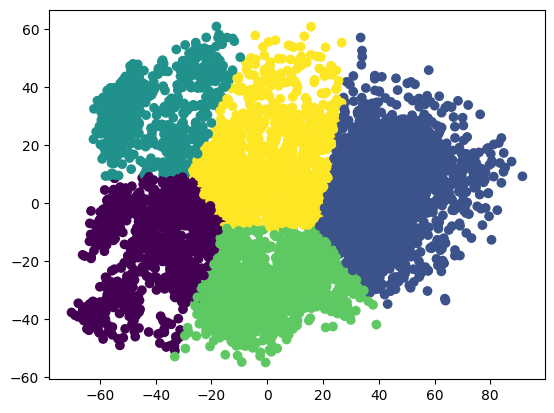

In [12]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(pca_transformed)
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c=kmeans.labels_)

MiniBatchKMeans clustering on the reduced data.

[0 4 0 ... 0 0 0]


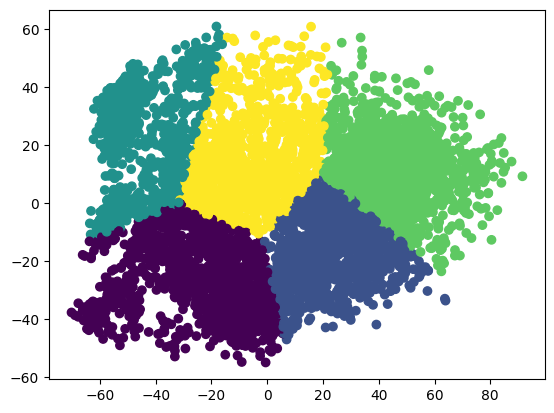

In [13]:
minibatch = MiniBatchKMeans(n_clusters=5, random_state=0).fit(pca_transformed)
print(minibatch.labels_)
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c=minibatch.labels_)

DBSCAN clustering on the reduced data.

[-1 -1  0 ... -1 -1 -1]


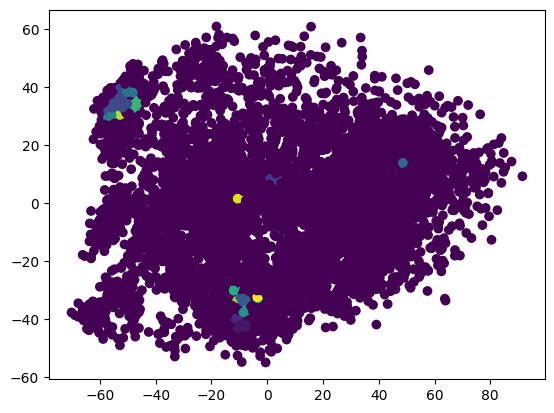

In [15]:
dbscan = DBSCAN(eps=1, min_samples=10).fit(pca_transformed)
print(dbscan.labels_)
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c=dbscan.labels_)

Hierarchical clustering on the reduced data.

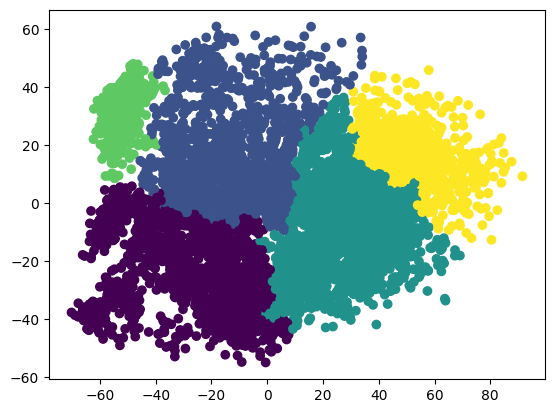

In [16]:
agg = AgglomerativeClustering(n_clusters=5).fit(pca_transformed)
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c=agg.labels_)

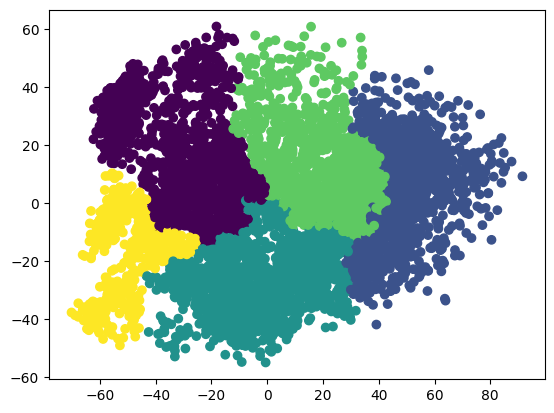

In [19]:
birch = Birch(n_clusters=5).fit(pca_transformed)
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c=birch.labels_)